# Kopuły
## Importy

In [1]:
# pip install numpy pandas seaborn matplotlib yfinance scipy sklarpy pingouin
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, lognorm, kstest, shapiro, t, pearsonr, kendalltau, spearmanr
from sklarpy.copulas import student_t_copula, gaussian_copula, clayton_copula, gumbel_copula, frank_copula
from sklarpy.univariate import student_t
from pingouin import multivariate_normality

## Ceny akcji NVIDA
Źródło danych Yahoo Finance: https://finance.yahoo.com/chart/NVDA.

Tak jak w zadaniu pierwszym, pobieramy dzienne dane cen akcji NVIDIA Corporation z 2023 roku. Interesuje nas kolumna opisująca ceny zamknięcia Close_NVDA. Ten szereg różnicujemy by uzyskać szereg czasowy strat dziennych (wartości ujemne to straty, dodatnie to zyski).

In [2]:
nvda_data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")
nvda_data.columns = ["_".join(col).strip() for col in nvda_data.columns]
nvda_data["diff_nvda"] = nvda_data["Close_NVDA"].diff()
nvda_data = nvda_data.dropna(subset=["diff_nvda"])

[*********************100%***********************]  1 of 1 completed


Możemy przedstawić szereg czasowy cen zamknięcia akcji NVDA na wykresie:

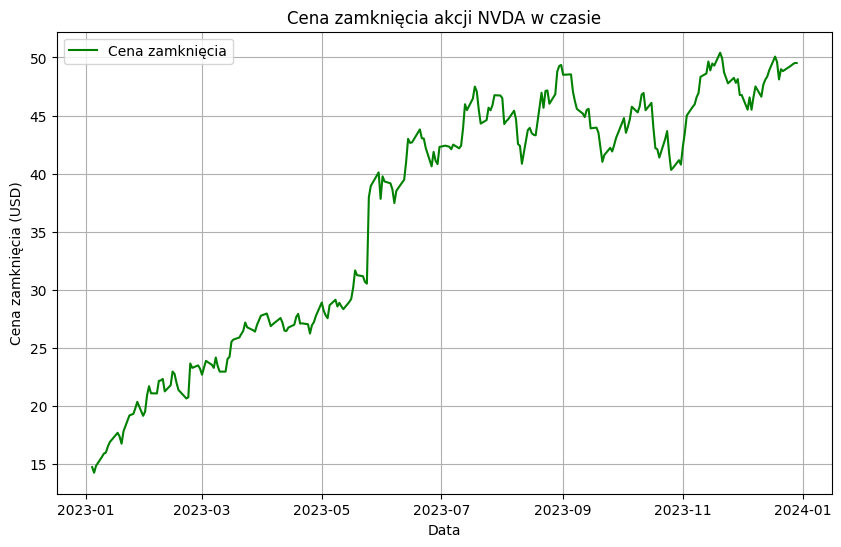

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='green', label="Cena zamknięcia")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Cena zamknięcia akcji NVDA w czasie")
plt.legend()
plt.grid()
plt.show()

## Ceny akcji Intel
Źródło danych Yahoo Finance: https://finance.yahoo.com/chart/INTC.

Dane, które mogą być powiązane z cenami akcji NVIDIA Corporation to na przykład ceny akcji Intel Corporation (INTC). Wynika to z ich powiązania branżowego. Obie firmy działają w sektorze półprzewodników, a ich ceny akcji mogą wykazywać korelację ze względu na podobne czynniki wpływające na rynek, takie jak popyt na technologie, innowacje czy globalne wydarzenia ekonomiczne.

In [4]:
intc_data = yf.download("INTC", start="2023-01-01", end="2023-12-31")
intc_data.columns = ["_".join(col).strip() for col in intc_data.columns]
intc_data["diff_intc"] = intc_data["Close_INTC"].diff()
intc_data = intc_data.dropna(subset=["diff_intc"])

[*********************100%***********************]  1 of 1 completed


Probraliśmy dzienne dane cen akcji INTC z 2023 roku, więc oba szeregi mają tą samą częstotliwość (obejmują ten sam okres czasowy). Tak jak w przypadku akcji NVDA interesuje nas kolumna opisująca ceny zamknięcia Close_INTC. Ten szereg różnicujemy by uzyskać szereg czasowy strat dziennych.

Możemy porównać szeregi czasowe cen zamknięcia akcji NVDA i INTC na wykresie:

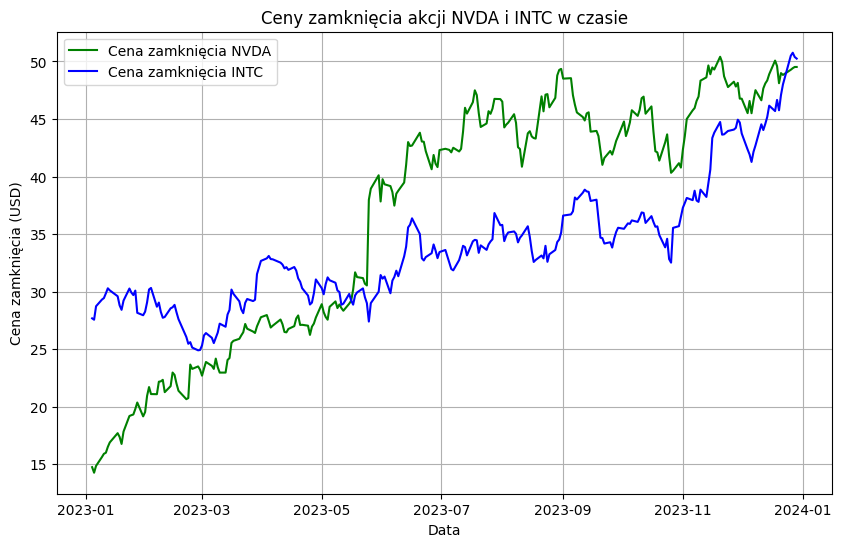

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(nvda_data.index, nvda_data["Close_NVDA"], color='green', label="Cena zamknięcia NVDA")
plt.plot(intc_data.index, intc_data["Close_INTC"], color='blue', label="Cena zamknięcia INTC")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.title("Ceny zamknięcia akcji NVDA i INTC w czasie")
plt.legend()
plt.grid()
plt.show()

- Obie serie czasowe wykazują ogólny trend wzrostowy. Cena zamknięcia akcji NVDA wzrosła z około 15 USD do ponad 45 USD, podczas gdy cena zamknięcia akcji INTC wzrosła z około 25 USD do około 45 USD.
- Ceny zamknięcia akcji NVDA wykazują większą zmienność w porównaniu do cen zamknięcia akcji INTC. Widać to po większych wahaniach zielonej linii w porównaniu do niebieskiej linii.
- Obie serie czasowe wydają się być powiązane, ponieważ ich ceny zamknięcia poruszają się w podobnym kierunku w dłuższym okresie czasu. W szczególności, w okresach wzrostu i spadku cen, obie linie wykazują podobne wzorce. Może to sugerować, że ceny zamknięcia akcji NVDA i INTC są skorelowane i mogą być pod wpływem podobnych czynników rynkowych.

## Podstawowe statystyki
Możemy połączyć oba zróżnicowane szeregi by łatwiej się do nich odnosić:

In [6]:
data = pd.DataFrame({
    "diff_nvda": nvda_data["diff_nvda"],
    "diff_intc": intc_data["diff_intc"]
}).dropna()

Wyświetlimy podstawowe informacje o zbiorze:

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2023-01-04 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diff_nvda  249 non-null    float64
 1   diff_intc  249 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB
None


- Dane obejmują 249 wpisów, co oznacza, że mamy do czynienia z codziennymi zmianami cen zamknięcia akcji NVDA i INTC w okresie od 4 stycznia 2023 roku do 29 grudnia 2023 roku.
- Obie kolumny, diff_nvda i diff_intc, zawierają 249 niepustych wartości (non-null), co oznacza, że nie ma brakujących danych w tym zbiorze.

Możemy też sprawdzić podstawowe statysktyki zbioru:

In [8]:
print(data.describe())

        diff_nvda   diff_intc
count  249.000000  249.000000
mean     0.141394    0.094458
std      1.017007    0.812057
min     -2.277000   -2.099998
25%     -0.443001   -0.430000
50%      0.139000    0.129999
75%      0.634003    0.579998
max      7.441999    3.020000


- Średnia zmiana ceny zamknięcia dla NVDA wynosi około 0.141 USD, a dla INTC około 0.094 USD. Oznacza to, że średnio ceny zamknięcia obu akcji wzrastały, przy czym NVDA miała nieco większy średni wzrost.
- Odchylenie standardowe dla NVDA wynosi około 1.017, a dla INTC około 0.812. Wskazuje to, że zmiany cen NVDA są bardziej zmienne w porównaniu do INTC.
- Największy spadek ceny zamknięcia dla NVDA wynosił -2.277 USD, a dla INTC -2.100 USD. Największy wzrost ceny zamknięcia dla NVDA wynosił 7.442 USD, a dla INTC 3.020 USD. NVDA wykazuje większe skrajne wartości zarówno w przypadku wzrostów, jak i spadków.
- Dla NVDA, 25% zmian cen jest mniejszych niż -0.443 USD, 50% (mediana) wynosi 0.139 USD, a 75% jest mniejszych niż 0.634 USD. Dla INTC, 25% zmian cen jest mniejszych niż -0.430 USD, mediana wynosi 0.130 USD, a 75% jest mniejszych niż 0.580 USD. Wskazuje to, że większość zmian cen dla obu akcji jest stosunkowo niewielka, ale NVDA ma większe wahania.

Narysujemy wykres obu szeregów:

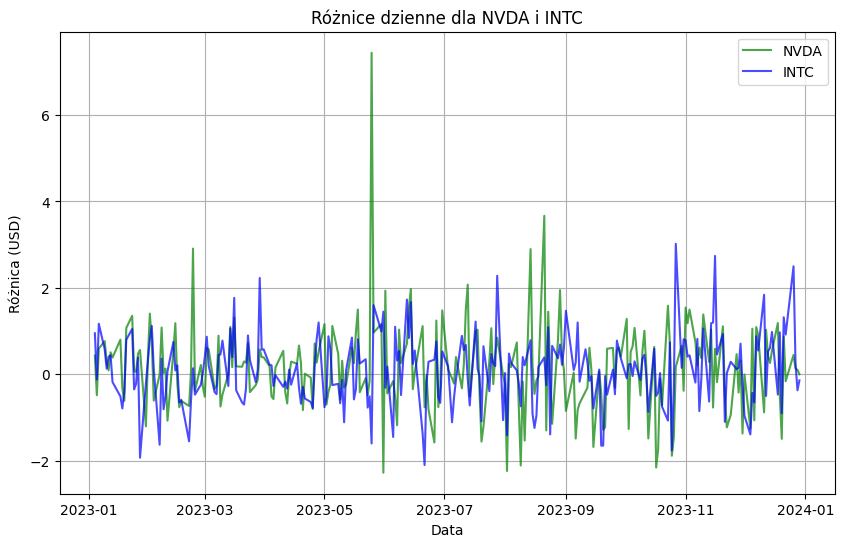

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["diff_nvda"], label="NVDA", color="green", alpha=0.7)
plt.plot(data.index, data["diff_intc"], label="INTC", color="blue", alpha=0.7)
plt.title("Różnice dzienne dla NVDA i INTC")
plt.xlabel("Data")
plt.ylabel("Różnica (USD)")
plt.legend()
plt.grid(True)
plt.show()

- Obie linie wykazują dużą zmienność w ciągu roku.
- Największy skok w różnicy cen akcji NVDA wystąpił w okolicach czerwca 2023 roku, gdzie różnica wyniosła ponad 7 USD.
- Różnice cen akcji NVDA i INTC oscylują wokół zera, co oznacza, że w większości dni różnice były niewielkie.

Możemy sprawdzić wartości odstające za pomocą wykresu pudełkowego:

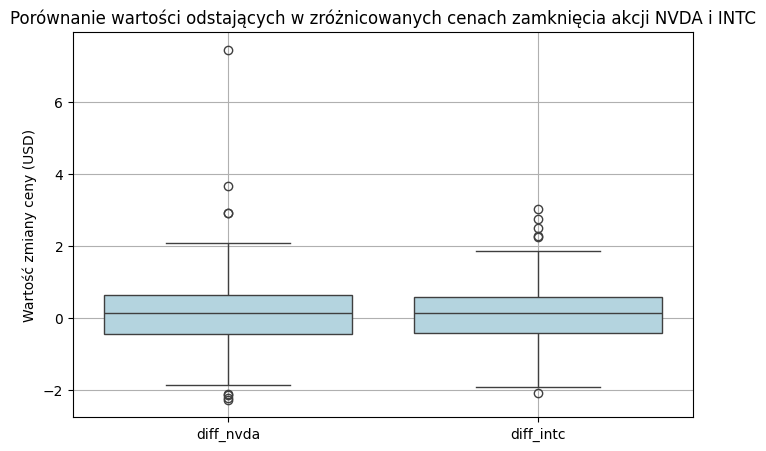

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, color='lightblue')
plt.title("Porównanie wartości odstających w zróżnicowanych cenach zamknięcia akcji NVDA i INTC")
plt.xlabel("")
plt.ylabel("Wartość zmiany ceny (USD)")
plt.grid(True)
plt.show()

- Mediana zmian cen akcji dla obu firm jest bliska zeru, co sugeruje, że większość zmian cen oscyluje wokół tej wartości.
- Rozkład zmian cen akcji NVDA jest szerszy niż INTC, co oznacza, że zmiany cen akcji NVDA są bardziej zróżnicowane.
- W obu przypadkach występują wartości odstające, ale w przypadku NVDA są one bardziej ekstremalne, co może sugerować większą zmienność cen akcji tej firmy.
- Zakres zmian cen akcji NVDA jest większy niż INTC, co może sugerować większą dynamikę rynku dla akcji NVDA.

Policzymy korelację liniową, statystyki Tau Kendalla oraz Rho Spearmana w celu oceny zależności pomiędzy zmiennymi.\
Korelacja Pearsona mierzy liniową zależność między zmiennymi. Wynik to współczynnik korelacji Pearsona (wartość od -1 do 1) i wartość p, która ocenia istotność tej korelacji.

In [11]:
pearson_corr, pearson_p = pearsonr(data["diff_nvda"], data["diff_intc"])
print(f"Korelacja Pearsona: {pearson_corr}, p-value: {pearson_p}")

Korelacja Pearsona: 0.22696168678007794, p-value: 0.0003054825171388767


Wartość 0.227 wskazuje na słabą, ale dodatnią zależność liniową między diff_nvda i diff_intc. Wartość p jest bardzo mała (0.0003), co oznacza, że zależność jest statystycznie istotna.

Statystyka Tau Kendalla mierzy monotoniczną zależność między zmiennymi na podstawie par porównywalnych.

In [12]:
kendall_corr, kendall_p = kendalltau(data["diff_nvda"], data["diff_intc"])
print(f"Statystyka Tau Kendalla: {kendall_corr}, p-value: {kendall_p}")

Statystyka Tau Kendalla: 0.2444355499226613, p-value: 9.513421966973758e-09


Wartość 0.244 wskazuje na umiarkowaną dodatnią monotoniczną zależność między zmiennymi. Tau Kendalla jest bardziej odporny na wartości odstające niż korelacja Pearsona. Bardzo niski poziom p ($9.51 \times 10^{-9}$) wskazuje, że zależność jest istotna.

Statystyka Rho Spearmana mierzy monotoniczną zależność na podstawie rang zmiennych.

In [13]:
spearman_corr, spearman_p = spearmanr(data["diff_nvda"], data["diff_intc"])
print(f"Statystyka Rho Spearmana: {spearman_corr}, p-value: {spearman_p}")

Statystyka Rho Spearmana: 0.35082557657469027, p-value: 1.2707357294460764e-08


Wartość 0.351 również wskazuje na umiarkowaną dodatnią monotoniczną zależność między zmiennymi. Rho Spearmana, podobnie jak Tau Kendalla, opiera się na rangach i jest mniej wrażliwy na wartości odstające. Bardzo mała wartość p ($1.27 \times 10^{-8}$) wskazuje na istotność statystyczną tej zależności.

Wnioski:
- Wszystkie trzy miary korelacji wskazują, że istnieje statystycznie istotna zależność między zmianami wartości diff_nvda i diff_intc.
- Korelacja Pearsona sugeruje, że zależność liniowa jest raczej słaba (0.227). Tau Kendalla i Spearmana wskazują na umiarkowaną zależność monotoniczną. Wyższe wartości tych współczynników w porównaniu do Pearsona mogą sugerować, że związek między zmiennymi jest nieliniowy lub mniej czuły na wartości odstające.

## Dopasowanie rozkładów
Za pomocą histogramu możemy zobaczyć, jak rozkładają się wartości w zróżnicowanym szeregu cen akcji NVDA:

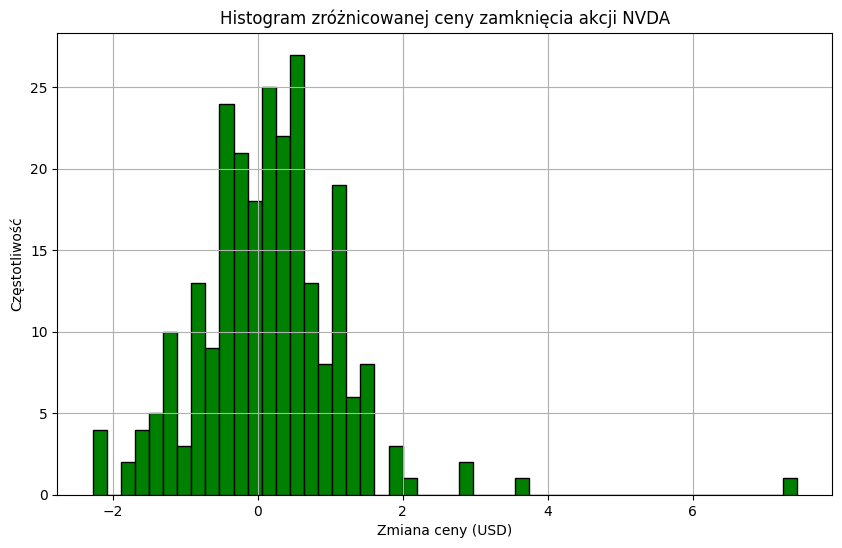

In [14]:
plt.figure(figsize=(10, 6))
data["diff_nvda"].hist(bins=50, edgecolor='k', color='green')
plt.title("Histogram zróżnicowanej ceny zamknięcia akcji NVDA")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

Z zadania pierwszego wiemy, że zróżnicowane ceny zamknięcia akcji NVDA nie pochodzą z rozkładu normalnego, ale mogą pochodzić z rozkładu t-Studenta:

In [15]:
# Test Shapiro-Wilka
stat, p_value = shapiro(data["diff_nvda"])
print(f"Statystyka testowa: {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę. Dane nie są zgodne z rozkładem normalnym.")

Statystyka testowa: 0.9074364202523346
p-value: 2.8189685408122895e-11
Odrzucamy hipotezę. Dane nie są zgodne z rozkładem normalnym.


In [16]:
# Test Kołmogorowa-Smirnowa
params = t.fit(data["diff_nvda"])

stat, p_value = kstest(data["diff_nvda"], 't', args=params)
print(f"Statystyka testowa: {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę. Dane nie są zgodne z rozkładem t-Studenta.")

Statystyka testowa: 0.02445432671886949
p-value: 0.9975952220530279
Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu t-Studenta.


Za pomocą histogramu możemy również zobaczyć, jak rozkładają się wartości w zróżnicowanym szeregu cen akcji INTC:

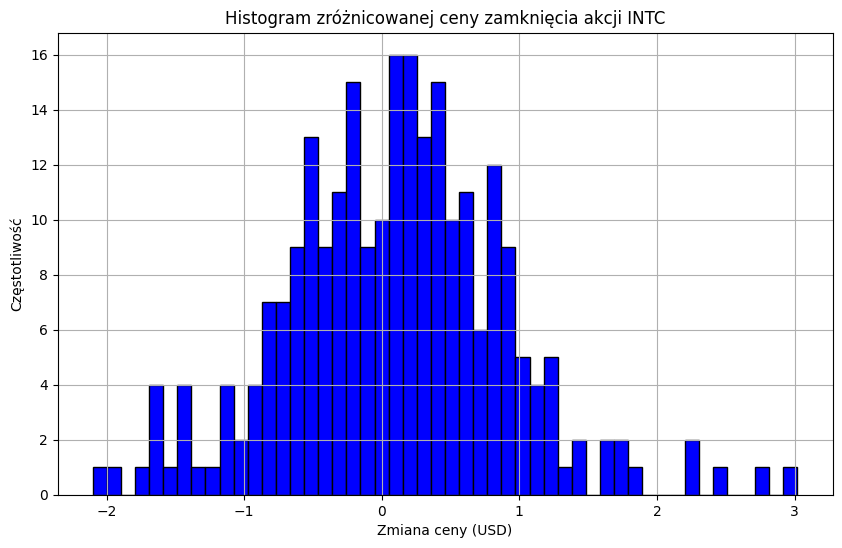

In [17]:
plt.figure(figsize=(10, 6))
data["diff_intc"].hist(bins=50, edgecolor='k', color='blue')
plt.title("Histogram zróżnicowanej ceny zamknięcia akcji INTC")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Częstotliwość")
plt.grid(True)
plt.show()

- Zmiany cen zamknięcia akcji INTC są najczęściej niewielkie, oscylujące wokół 0 USD.
- Rozkład zmian cen jest symetryczny, co sugeruje, że zmiany w górę i w dół są równie prawdopodobne.
- Wartości skrajne (duże zmiany cen) są rzadkie.

Dane mogą pochodzić z rozkładu normalnego, ponieważ histogram ma kształt dzwonu, charakterystyczny dla rozkładu normalnego. Możemy spróbować dopasować rozkład normalny i porównać go z histogramem:

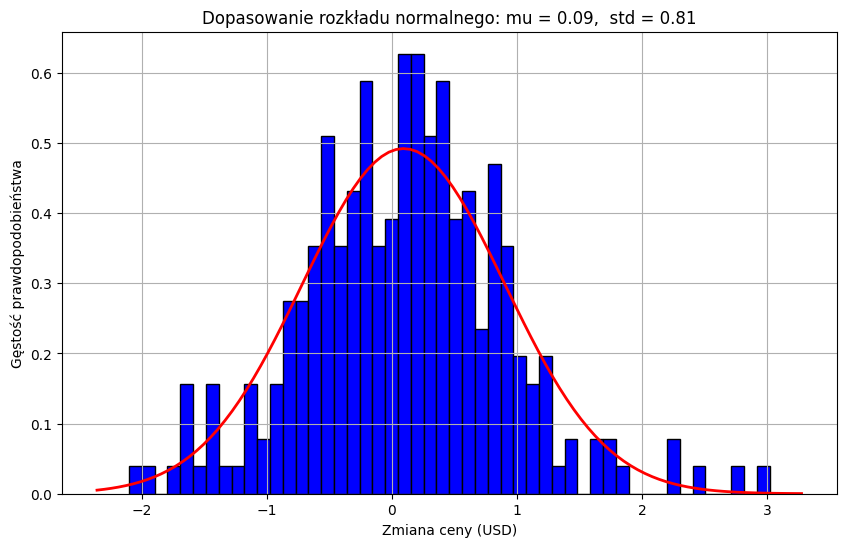

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data["diff_intc"], bins=50, density=True, color='blue', edgecolor='k')

mu, std = norm.fit(data["diff_intc"])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'red', linewidth=2)
plt.title(f"Dopasowanie rozkładu normalnego: mu = {mu:.2f},  std = {std:.2f}")
plt.xlabel("Zmiana ceny (USD)")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.grid(True)
plt.show()

Czarna krzywa reprezentuje rozkład normalny o średniej $\mu$ = 0.09 i odchyleniu standardowym $\sigma$ = 0.81.

Przetestujemy, czy dane pochodzą z rozkładu normalnego za pomocą testu Shapiro-Wilka:

In [19]:
stat, p_value = shapiro(data["diff_intc"])
print(f"Statystyka testowa: {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu normalnego.")
else:
    print("Odrzucamy hipotezę. Dane nie są zgodne z rozkładem normalnym.")

Statystyka testowa: 0.9864647489426343
p-value: 0.018726932252026336
Odrzucamy hipotezę. Dane nie są zgodne z rozkładem normalnym.


Dane nie pochodzą z rozkładu normalnego. Czy pochodzą z rozkładu t-Studenta? Zastosujemy test Kołmogorowa-Smirnowa do oceny zgodności danych z rozkładem t-Studenta:

In [20]:
params = t.fit(data["diff_intc"])

stat, p_value = kstest(data["diff_intc"], 't', args=params)
print(f"Statystyka testowa: {stat}")
print(f"p-value: {p_value}")

if p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu t-Studenta.")
else:
    print("Odrzucamy hipotezę. Dane nie są zgodne z rozkładem t-Studenta.")

Statystyka testowa: 0.0403306018486817
p-value: 0.7972732421122546
Brak podstaw do odrzucenia hipotezy. Dane mogą pochodzić z rozkładu t-Studenta.


Zatem zróżnicowane ceny zamknięcia akcji INTC również mogą pochodzić z rozkładu t-Studenta.

## Dopasowanie kopuł
Dopasujemy pięć kopuł i ocenimy ich dopasowanie:
- eliptyczne - T-studenta, normalna,
- archimedejskie - Gumbela, Claytona, Franka.

Sprawdzimy jak wygląda nasz rozkład łączny:

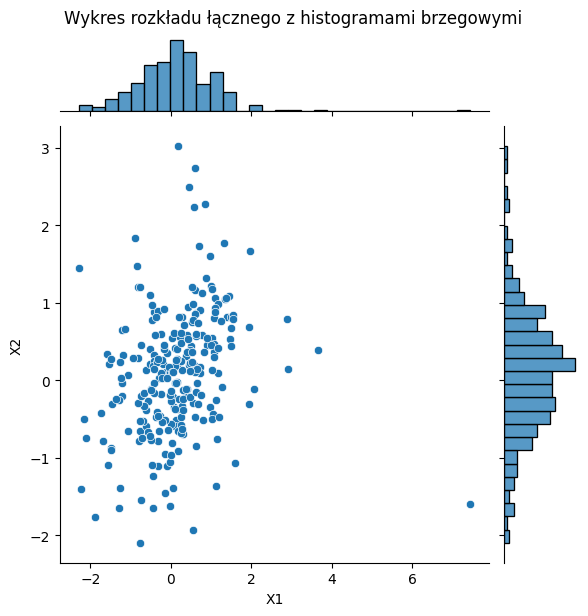

In [21]:
g = sns.jointplot(x="diff_nvda", y="diff_intc", data=data, kind="scatter", marginal_kws=dict(bins=30, fill=True))

g.fig.suptitle("Wykres rozkładu łącznego z histogramami brzegowymi", y=1.02)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Punkty danych są skoncentrowane wokół środka układu współrzędnych, co sugeruje, że zmienne mogą być skorelowane w sposób liniowy. Wygląda na to, że rozkład jest raczej eliptyczny.

### Kopuła T-Studenta
Ponieważ rozkłady brzegowe mogą pochodzić z rozkładu t-Studenta, przekształcimy szeregi na dystrybuanty brzegowe dopasowując rozkłady t-Studenta:

In [22]:
fitted_marginals = {
    0: student_t.fit(data["diff_nvda"]),
    1: student_t.fit(data["diff_intc"])
}

data["u1"] = fitted_marginals[0].cdf(np.array(data["diff_nvda"]))
data["u2"] = fitted_marginals[1].cdf(np.array(data["diff_intc"]))

Dopasowujemy kopułę t-Studenta z uwzględnieniem brzegowych rozkładów:

In [23]:
student_t_fit = student_t_copula.fit(data[["u1", "u2"]], mdists=fitted_marginals)

Możemy ocenić dopasowanie kopuły za pomocą miar:
- Log-Likelihood: jest to miara, która ocenia, jak dobrze model kopuły pasuje do danych. Wyższa wartość log-likelihood wskazuje na lepsze dopasowanie modelu do danych.
- AIC (Akaike Information Criterion): AIC uwzględnia zarówno dopasowanie modelu, jak i jego złożoność. Niższa wartość AIC wskazuje na lepszy model, ponieważ oznacza lepsze dopasowanie przy mniejszej złożoności.
- BIC (Bayesian Information Criterion): BIC również uwzględnia dopasowanie modelu i jego złożoność, ale karze bardziej za złożoność niż AIC. Niższa wartość BIC wskazuje na lepszy model.

Zatem niższe wartości AIC i BIC oraz wyższa wartość log-likelihood wskazują na lepsze dopasowanie kopuły do danych.

Aby porównać wyniki miar różnych kopuł dodamy je do tabeli:

In [24]:
results = pd.DataFrame({
    "Copula": ["Student-t"],
    "Log-Likelihood": [student_t_fit.loglikelihood()],
    "AIC": [student_t_fit.aic()],
    "BIC": [student_t_fit.bic()]
})

print(results.loc[0])

Copula             Student-t
Log-Likelihood   -406.962068
AIC               829.924137
BIC                858.06376
Name: 0, dtype: object


Wyniki podsumujemy dla wszystkich kopuł jednocześnie. Analogicznie możemy dopasować pozostałe kopuły.

### Kopuła Gaussa

In [25]:
gaussian_fit = gaussian_copula.fit(data[["u1", "u2"]], mdists=fitted_marginals)

results = pd.concat(
    [results, pd.DataFrame({
        "Copula": ["Gaussian"],
        "Log-Likelihood": [gaussian_fit.loglikelihood()],
        "AIC": [gaussian_fit.aic()],
        "BIC": [gaussian_fit.bic()],
    })],
    ignore_index=True
)

print(results.loc[1])

Copula              Gaussian
Log-Likelihood   -407.725059
AIC               829.450118
BIC               854.072288
Name: 1, dtype: object


### Kopuła Claytona

In [26]:
clayton_fit = clayton_copula.fit(data[["u1", "u2"]], mdists=fitted_marginals, verbose=True)

results = pd.concat(
    [results, pd.DataFrame({
        "Copula": ["Clayton"],
        "Log-Likelihood": [clayton_fit.loglikelihood()],
        "AIC": [clayton_fit.aic()],
        "BIC": [clayton_fit.bic()],
    })],
    ignore_index=True
)

print(results.loc[2])

Copula               Clayton
Log-Likelihood    438.569565
AIC               -861.13913
BIC              -832.999507
Name: 2, dtype: object


C:\Users\magda\repos\Market_risk\venv\lib\site-packages\sklarpy\multivariate\_distributions\_archimedean.py:405: RuntimeWarning: invalid value encountered in log
  log_cs += np.log(theta_inv + d - i)
C:\Users\magda\repos\Market_risk\venv\lib\site-packages\sklarpy\multivariate\_distributions\_archimedean.py:408: RuntimeWarning: invalid value encountered in log
  return (d * np.log(theta)) \
C:\Users\magda\repos\Market_risk\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:551: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
C:\Users\magda\repos\Market_risk\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the

Ostrzeżenia wskazują na potencjalne problemy z numeryczną stabilnością i optymalizacją, które mogą wpłynąć na wiarygodność wyników.
### Kopuła Gumbela

In [27]:
gumbel_fit = gumbel_copula.fit(data[["u1", "u2"]], mdists=fitted_marginals)

results = pd.concat(
    [results, pd.DataFrame({
        "Copula": ["Gumbel"],
        "Log-Likelihood": [gumbel_fit.loglikelihood()],
        "AIC": [gumbel_fit.aic()],
        "BIC": [gumbel_fit.bic()],
    })],
    ignore_index=True
)

print(results.loc[3])

Copula                Gumbel
Log-Likelihood   -301.233864
AIC               618.467728
BIC               646.607351
Name: 3, dtype: object


### Kopuła Franka

In [28]:
frank_fit = frank_copula.fit(data[["u1", "u2"]], mdists=fitted_marginals)

results = pd.concat(
    [results, pd.DataFrame({
        "Copula": ["Frank"],
        "Log-Likelihood": [frank_fit.loglikelihood()],
        "AIC": [frank_fit.aic()],
        "BIC": [frank_fit.bic()],
    })],
    ignore_index=True
)

print(results.loc[4])

Copula                 Frank
Log-Likelihood   -308.599825
AIC                633.19965
BIC               661.339273
Name: 4, dtype: object


C:\Users\magda\repos\Market_risk\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:551: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


Ostrzeżenie odnosi się do problemów z obliczaniem gradientu funkcji celu w trakcie procesu optymalizacji.

Zestawienie wyników Log-Likelihood, AIC i BIC:

In [29]:
print("\nZestawienie wyników dla wszystkich kopuł:")
print(results)


Zestawienie wyników dla wszystkich kopuł:
      Copula  Log-Likelihood         AIC         BIC
0  Student-t     -406.962068  829.924137  858.063760
1   Gaussian     -407.725059  829.450118  854.072288
2    Clayton      438.569565 -861.139130 -832.999507
3     Gumbel     -301.233864  618.467728  646.607351
4      Frank     -308.599825  633.199650  661.339273


- Student-t i Gaussian mają podobne wartości log-likelihood, AIC i BIC, co sugeruje, że oba modele są porównywalne pod względem dopasowania do danych.
- Clayton ma znacznie wyższy log-likelihood i znacznie niższe wartości AIC i BIC w porównaniu do pozostałych modeli. To sugeruje, że model Claytona jest znacznie lepiej dopasowany do danych niż pozostałe modele.
- Gumbel i Frank mają wyższe wartości AIC i BIC w porównaniu do Student-t i Gaussian, co sugeruje, że są one mniej dopasowane do danych.

Wyniki dla kopuły Claytona znacznie różnią się od pozostałych (w porównaniu do pozostałych wyglądają jak błąd lub nadmierne dopasowanie do danych). Sprawdzimy z czego może to wynikać. Wyświetlimy parametry dopasowanej kopuły Claytona:

In [30]:
print(clayton_fit.copula_params.to_dict)

{'theta': np.float64(12.580293977395721), 'd': 2}


Parametr theta w kopule Claytona wskazuje na siłę zależności pomiędzy zmiennymi. Wartość theta = 12.58 sugeruje stosunkowo silną zależność pozytywną pomiędzy zmiennymi. Tak wysoka wartość jest możliwa, ale może być to też wynik nadmiernego dopasowania (overfitting).

Aby wybrać najlepszą kopułę będziemy patrzeć na wyniki testu BIC. Posortujemy tabelę rosnąco względem kolumny BIC, więc najlepsza kopuła będzie na samej górze:

In [31]:
results_sorted = results.sort_values(by="BIC", ascending=True).reset_index(drop=True)

best_copula = results_sorted.iloc[0]
print("\nNajlepsza kopuła według BIC:")
print(best_copula)

print("\nTabela z wynikami (posortowana według BIC):")
print(results_sorted)


Najlepsza kopuła według BIC:
Copula               Clayton
Log-Likelihood    438.569565
AIC               -861.13913
BIC              -832.999507
Name: 0, dtype: object

Tabela z wynikami (posortowana według BIC):
      Copula  Log-Likelihood         AIC         BIC
0    Clayton      438.569565 -861.139130 -832.999507
1     Gumbel     -301.233864  618.467728  646.607351
2      Frank     -308.599825  633.199650  661.339273
3   Gaussian     -407.725059  829.450118  854.072288
4  Student-t     -406.962068  829.924137  858.063760


Overfitting w przypadku kopuły Claytona można zdiagnozować, sprawdzając, czy wyniki modelu na danych testowych (np. Log-Likelihood, AIC, BIC) są gorsze niż na danych treningowych. Jeśli teraz założymy, że kopuła Claytona jest nadmiernie dopasowana, to drugą najlepszą kopułą według BIC będzie kopuła Gumbela.

Sprawdzimy dopasowanie kopuł generując z nich przykładowe próbki i porównując je z rozkładem łącznych oryginalnych danych. Możemy wygenerować próbki za pomocą metody rvs():

In [32]:
student_t_samples = student_t_fit.rvs(len(data))
gaussian_samples = gaussian_fit.rvs(len(data))
clayton_samples = clayton_fit.rvs(len(data))
gumbel_samples = gumbel_fit.rvs(len(data))
frank_samples = frank_fit.rvs(len(data))

Rysujemy wykresy rozrzutu:

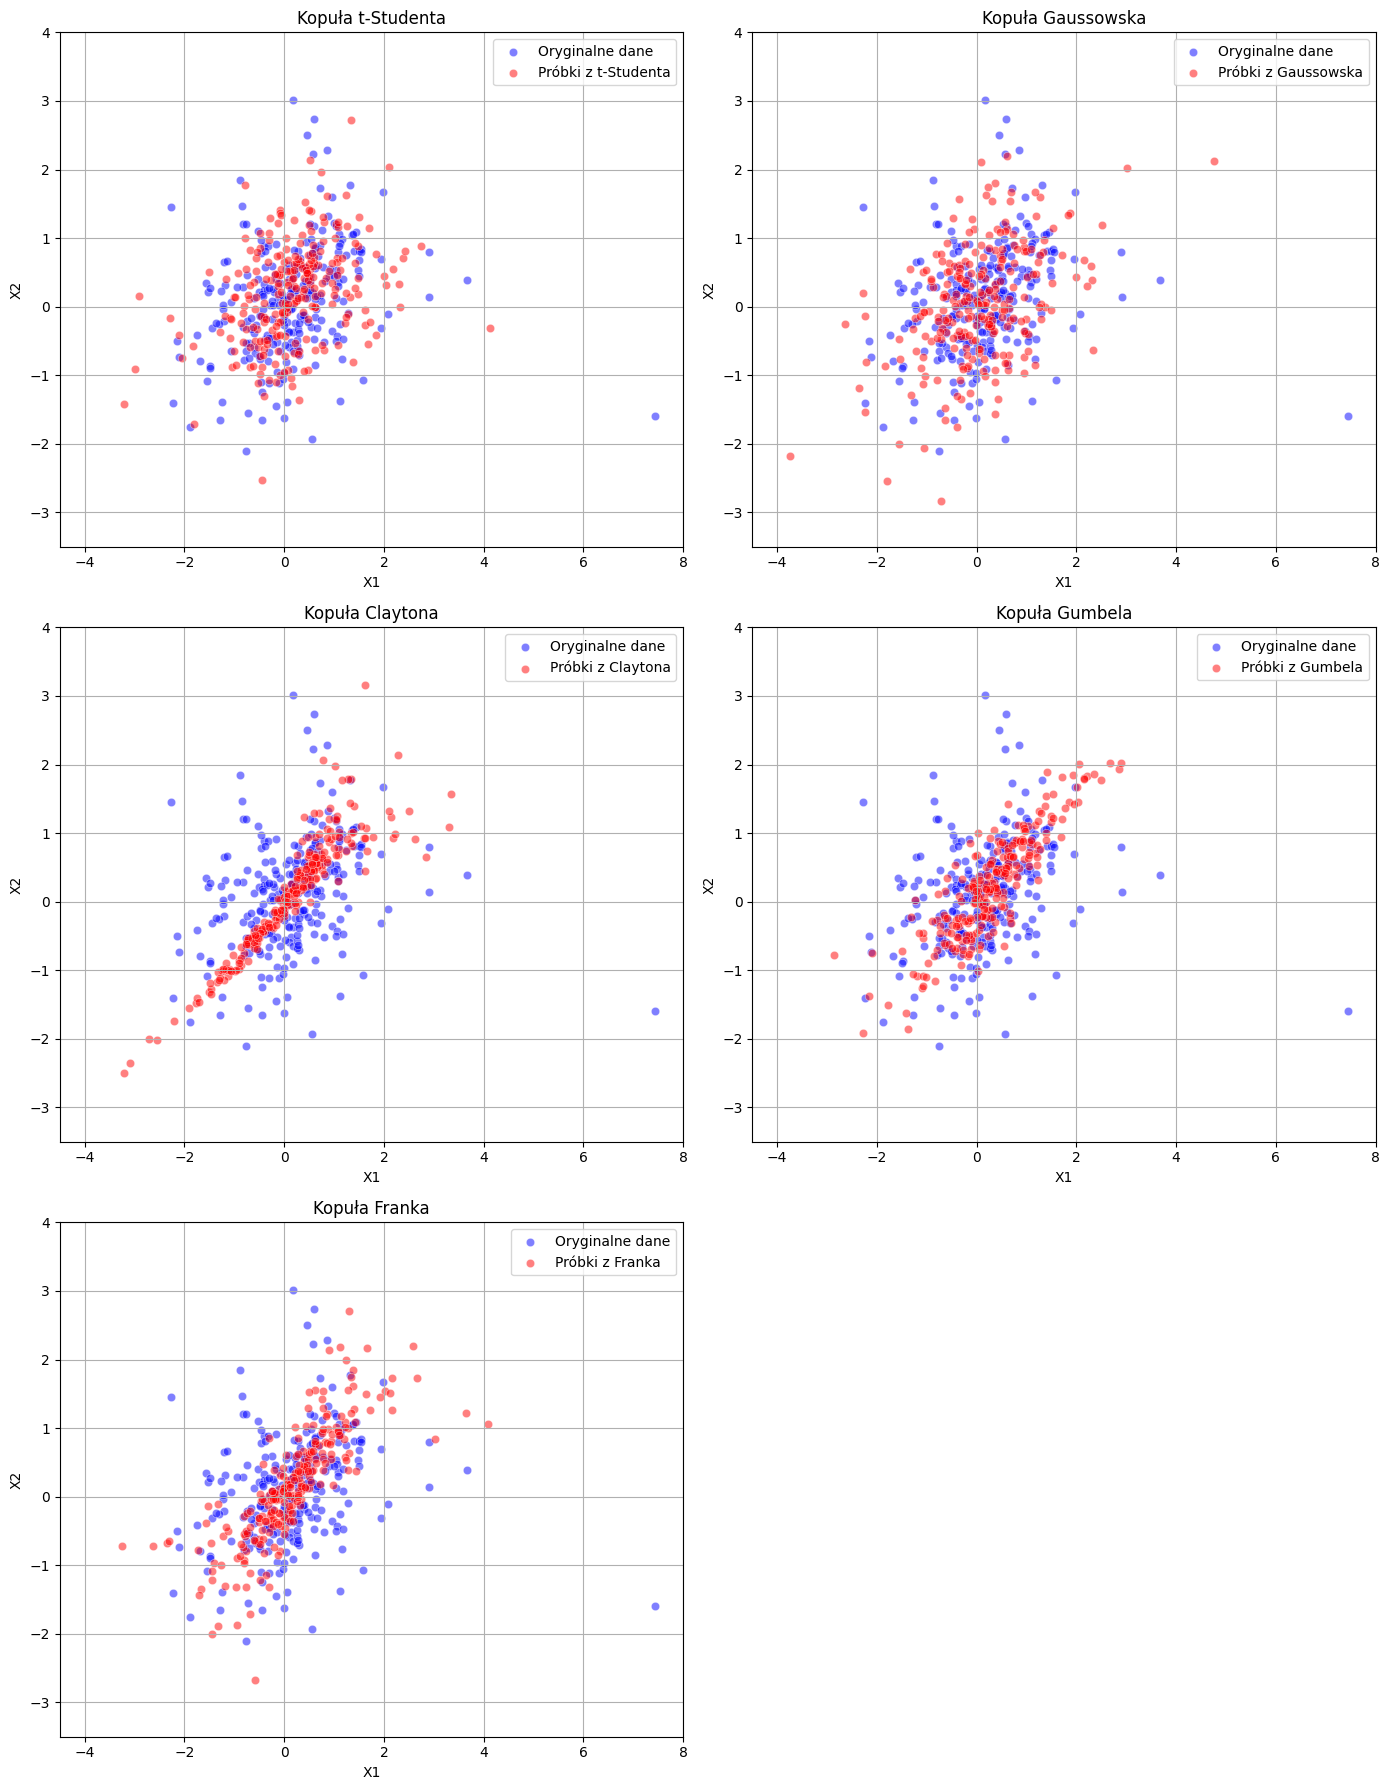

In [36]:
fig, ax = plt.subplots(3, 2, figsize=(14, 18))
axes = ax.flatten()

copula_samples = [
    (student_t_samples, "Kopuła t-Studenta"),
    (gaussian_samples, "Kopuła Gaussowska"),
    (clayton_samples, "Kopuła Claytona"),
    (gumbel_samples, "Kopuła Gumbela"),
    (frank_samples, "Kopuła Franka")
]

for i, (samples, title) in enumerate(copula_samples):
    sns.scatterplot(
        x=data["diff_nvda"], y=data["diff_intc"],
        ax=axes[i], color="blue", alpha=0.5, label="Oryginalne dane"
    )
    sns.scatterplot(
        x=samples[:, 0], y=samples[:, 1],
        ax=axes[i], color="red", alpha=0.5, label=f"Próbki z {title.split()[-1]}"
    )
    axes[i].set_title(title)
    axes[i].set_xlabel("X1")
    axes[i].set_ylabel("X2")
    axes[i].legend()
    axes[i].set_xlim(-4.5, 8)
    axes[i].set_ylim(-3.5, 4)
    axes[i].grid(True)

axes[-1].axis("off")

plt.tight_layout()
plt.show()

In [34]:
print(results_sorted[["Copula", "BIC"]])

      Copula         BIC
0    Clayton -832.999507
1     Gumbel  646.607351
2      Frank  661.339273
3   Gaussian  854.072288
4  Student-t  858.063760


- Punkty wygenerowane z kopuły Claytona skupiają się na przekątnej i prawie wcale nie przypominają rozrzutu danych oryginalnych.
- Próbki z kopuły Gumbela skupia się w centrum gęstości oryginalnych danych. Według testu BIC, kopuła Gumbela jest najlepsza.
- Punkty z kopuły Franka przypominają ciabattę i radzą sobie nieźle w odwzorowaniu rozrzutu oryginalnych danych.
- Kopuły Gaussa i t-Studenta miały podobne wyniki testu BIC. Próbki wygenerowane z tych kopuł pokrywają znaczną część obszarów zajmowanych przez niebieskie punkty, jednak nie są tak skupione w centralnych obszarach.

## Test Mardia
Możemy wykonać test na wielowymiarową normalność oraz policzyć skośność i kurtozę:

In [35]:
mardia_test = multivariate_normality(data[["diff_nvda", "diff_intc"]], alpha=0.05)

print("Test Mardia:")
print(mardia_test)

Test Mardia:
HZResults(hz=np.float64(2.55502290995489), pval=np.float64(4.476475116418126e-06), normal=False)


Wyniki testu Mardia (za pomocą statystyki Henze-Zirklera) wskazują, że dane nie spełniają założeń wielowymiarowej normalności.\
Statystyka hz = 2.555 jest miarą stopnia odchylenia danych od wielowymiarowego rozkładu normalnego. Im większa wartość, tym większe odchylenie od normalności. Niska wartość p oznacza, że możemy odrzucić hipotezę zerową, czyli założenie, że dane są wielowymiarowo normalne.